In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
file_path = "/content/drive/MyDrive/ljmu_project/Dataset_Ult_bnd_strength.xlsx"
df = pd.read_excel(file_path)
df.head()

,Youngs_Modulus_GPa,Layer_Height_mm,Infill_Density_perc,Print_Speed_mm_per_s,Ultimate_Bending_Strength_MPa
0,3.5,0.2,50,40,65
1,3.5,0.1,70,50,65
2,3.5,0.3,60,30,65
3,3.5,0.2,80,45,65
4,3.5,0.1,90,35,65


In [14]:
# 1. Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
       Youngs_Modulus_GPa  Layer_Height_mm  Infill_Density_perc  \
count           50.000000        50.000000            50.000000   
mean             2.240000         0.200000            72.500000   
std              0.970167         0.078246            14.854739   
min              0.600000         0.100000            45.000000   
25%              2.100000         0.100000            60.000000   
50%              2.200000         0.200000            72.500000   
75%              2.800000         0.300000            85.000000   
max              3.500000         0.300000           100.000000   

       Print_Speed_mm_per_s  Ultimate_Bending_Strength_MPa  
count             50.000000                      50.000000  
mean              39.180000                      45.600000  
std                6.323555                      16.946494  
min               29.000000                      15.000000  
25%               34.250000                      45.000000  
50%       

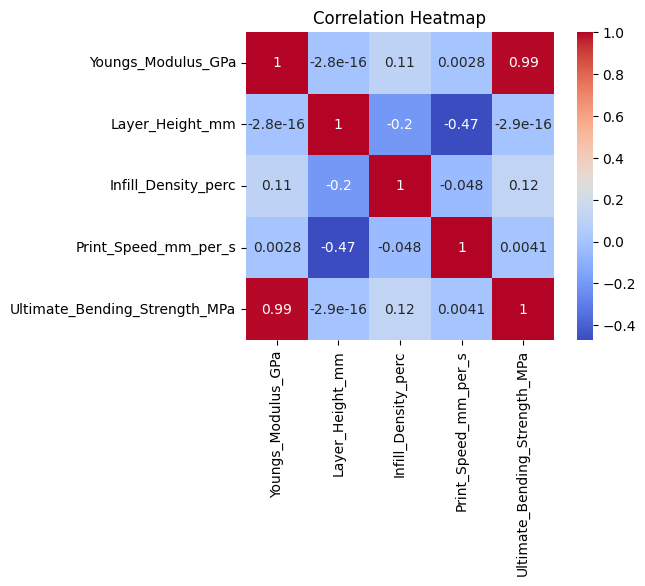

In [15]:
# 3. Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
print(df.columns)

Index(['Youngs_Modulus_GPa', 'Layer_Height_mm', 'Infill_Density_perc',
       'Print_Speed_mm_per_s', 'Ultimate_Bending_Strength_MPa'],
      dtype='object')


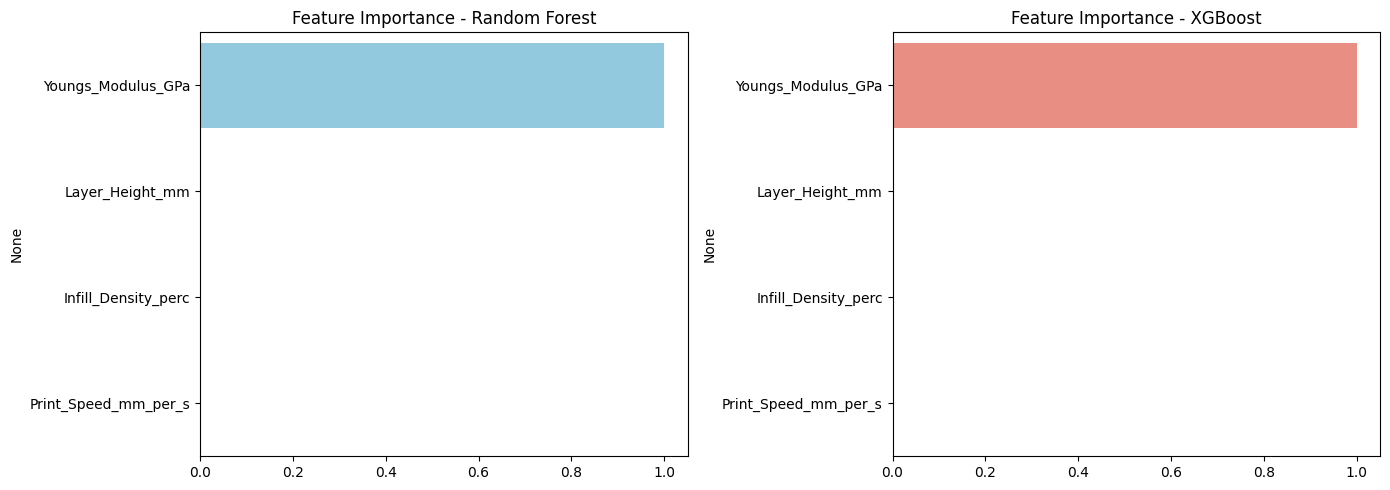

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns



# Define features and target variable
X = df[['Youngs_Modulus_GPa', 'Layer_Height_mm', 'Infill_Density_perc','Print_Speed_mm_per_s']]
y = df['Ultimate_Bending_Strength_MPa']

# Random Forest Regressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)
rf_feature_importance = rf.feature_importances_

# XGBoost Regressor
xgb = XGBRegressor(random_state=0)
xgb.fit(X, y)
xgb_feature_importance = xgb.feature_importances_

# Plot feature importance for both models
feature_names = X.columns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=rf_feature_importance, y=feature_names, ax=ax[0], color="skyblue")
ax[0].set_title("Feature Importance - Random Forest")

sns.barplot(x=xgb_feature_importance, y=feature_names, ax=ax[1], color="salmon")
ax[1].set_title("Feature Importance - XGBoost")

plt.tight_layout()
plt.show()


Key Observations:

***Young's Modulus (GPa) and Ultimate Bending Strength (MPa):***

A strong positive correlation of 0.99 exists between Young's Modulus and Ultimate Bending Strength. This suggests that materials with higher Young's Modulus (stiffness) tend to produce parts with higher ultimate bending strength.
Layer Height (mm) and Ultimate Bending Strength (MPa):

A very weak (almost negligible) correlation of -2.9e-16 is observed between Layer Height and Ultimate Bending Strength. This implies that layer height has almost no influence on the ultimate bending strength.
Infill Density (%) and Ultimate Bending Strength (MPa):

A moderate positive correlation of 0.12 is evident between Infill Density and Ultimate Bending Strength. This suggests that increasing the infill density slightly enhances the part's ultimate bending strength.
Print Speed (mm/s) and Ultimate Bending Strength (MPa):

A negligible correlation of 0.0041 exists between Print Speed and Ultimate Bending Strength. This indicates that print speed has almost no impact on the ultimate bending strength.
Other Correlations

Layer Height and Infill Density show a weak negative correlation of -0.2, suggesting that increasing layer height might slightly decrease the impact of infill density on ultimate bending strength.
Young's Modulus and Infill Density have a very weak positive correlation of 0.11, further emphasizing the minimal combined influence of material stiffness and infill density.

***Influencing Factors***

Based on the correlation matrix, the following factor appears to have the most significant impact on ultimate bending strength:

Young's Modulus: Using materials with higher Young's Modulus (stiffness) is the most effective way to boost ultimate bending strength.

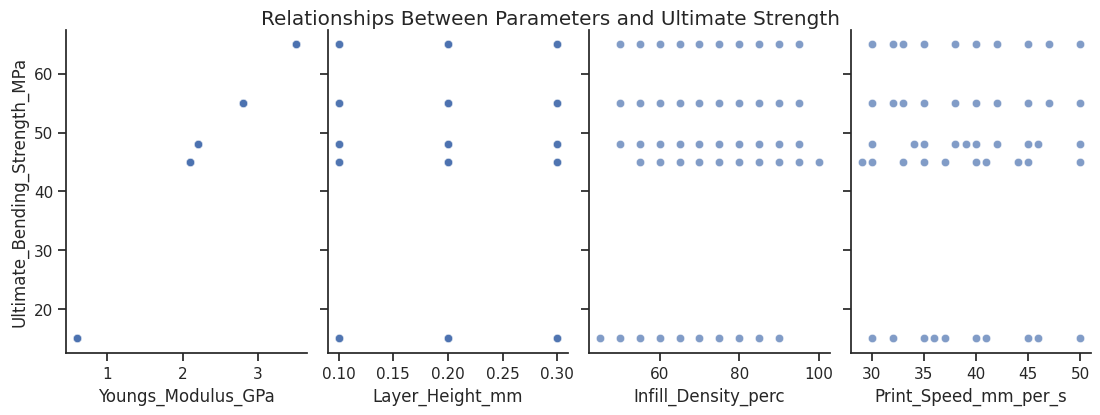

In [21]:
# Set up the grid of scatter plots
sns.set(style="ticks")
sns.pairplot(df, y_vars="Ultimate_Bending_Strength_MPa", x_vars=['Youngs_Modulus_GPa', 'Layer_Height_mm', 'Infill_Density_perc','Print_Speed_mm_per_s'], height=4, aspect=0.7, kind="scatter", plot_kws={'alpha':0.7})

# Show plot
plt.suptitle("Relationships Between Parameters and Ultimate Strength", y=1.02)
plt.show()

In [23]:
# 4. Check VIF to assess multicollinearity
X = df[['Youngs_Modulus_GPa', 'Layer_Height_mm', 'Infill_Density_perc','Print_Speed_mm_per_s']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                Feature        VIF
0    Youngs_Modulus_GPa   6.402865
1       Layer_Height_mm   5.660683
2   Infill_Density_perc  17.662007
3  Print_Speed_mm_per_s  16.793053


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Feature Selection (Example: Drop parameters with low correlation)
# In this example, we hypothetically remove 'Print_Speed_mm_s' based on low correlation with 'Ultimate_Strength'
selected_features = ['Youngs_Modulus_GPa', 'Layer_Height_mm', 'Infill_Density_perc']  # Adjust based on heatmap
X = df[selected_features]
y = df['Ultimate_Bending_Strength_MPa']

# Step 3: Build and Train Regression Model with Ridge or Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Try both Ridge and Lasso and choose based on performance
ridge_model = Ridge(alpha=1.65)  # You can tune alpha for better performance
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 4.404995873119832
R² Score: 0.9753690680322085


In [33]:
# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
y = df['Ultimate_Bending_Strength_MPa']
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)



In [34]:
# Linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [35]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [36]:
# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training R^2 Score: {r2_train:.2f}")
print(f"Testing R^2 Score: {r2_test:.2f}")
print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Testing Mean Squared Error: {mse_test:.2f}")



Training R^2 Score: 0.98
Testing R^2 Score: 0.97
Training Mean Squared Error: 4.66
Testing Mean Squared Error: 4.90


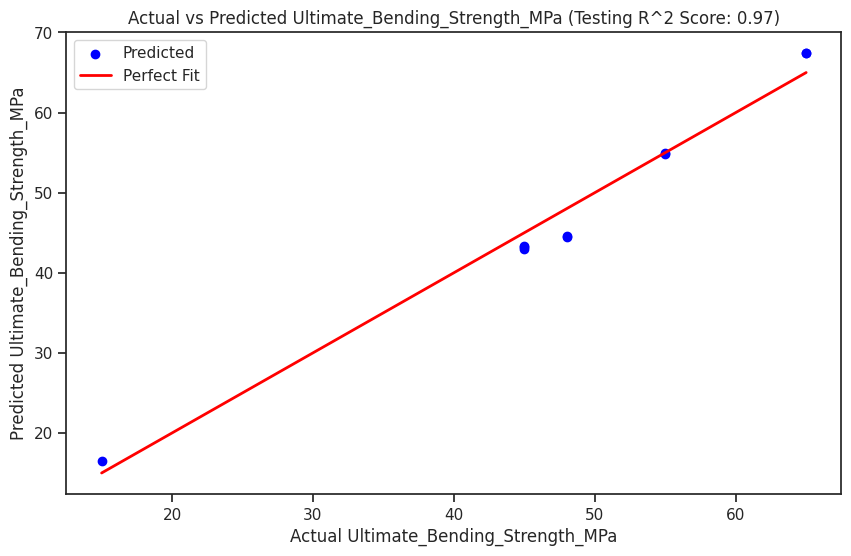

In [42]:
# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Ultimate_Bending_Strength_MPa')
plt.ylabel('Predicted Ultimate_Bending_Strength_MPa')
plt.title(f'Actual vs Predicted Ultimate_Bending_Strength_MPa (Testing R^2 Score: {r2_test:.2f})')
plt.legend()
plt.show()



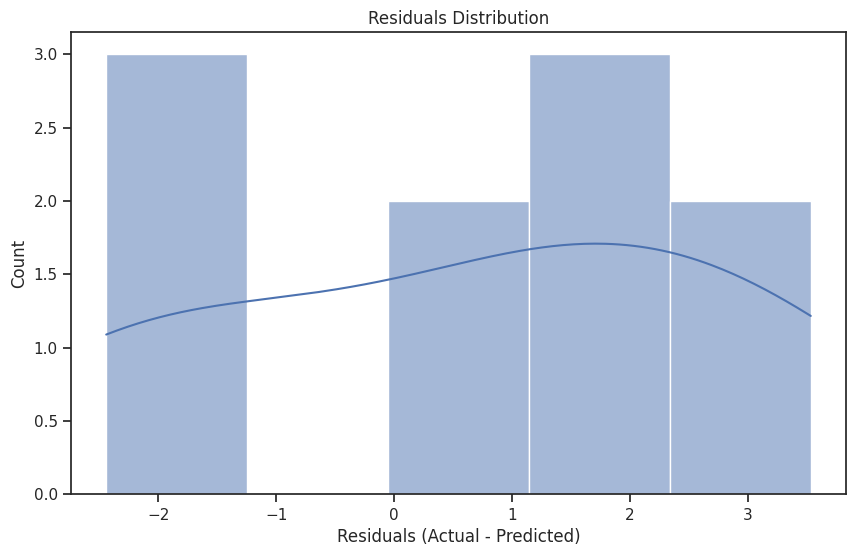

In [38]:
# Plot residuals to check for any patterns
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

In [45]:
# Using Ridge Regression as an example of regularization
ridge_model = Ridge(alpha=1.65)  # Adjust alpha to control regularization strength
ridge_model.fit(X_train, y_train)
ridge_test_pred = ridge_model.predict(X_test)
r2_ridge_test = r2_score(y_test, ridge_test_pred)
print(f"Testing R^2 Score with Ridge Regularization: {r2_ridge_test:.2f}")


Testing R^2 Score with Ridge Regularization: 0.98


In [46]:
# Display the final model equation
intercept = model.intercept_
coefficients = model.coef_
features = poly.get_feature_names_out(X.columns)
equation = f"Ultimate_Bending_Strength_MPa = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f}) * {feature}"

print("\nFinal Regression Equation:")
print(equation)


Final Regression Equation:
Ultimate_Bending_Strength_MPa = 4.65 + (17.39) * Youngs_Modulus_GPa + (2.63) * Layer_Height_mm + (0.02) * Infill_Density_perc


In [47]:
# Display Actual vs Predicted for inspection
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Compression Strength (MPa):")
print(comparison_df)


Actual vs Predicted Compression Strength (MPa):
    Actual  Predicted
28      45  42.914512
11      55  54.897739
10      55  54.786624
41      15  16.555357
2       65  67.406294
27      45  43.364065
38      48  44.559655
31      48  44.466210
22      45  43.159506
4       65  67.441634


In [48]:
# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
y = df['Ultimate_Bending_Strength_MPa']
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)



In [49]:
# Linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training R^2 Score: {r2_train:.2f}")
print(f"Testing R^2 Score: {r2_test:.2f}")
print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Testing Mean Squared Error: {mse_test:.2f}")


Training R^2 Score: 1.00
Testing R^2 Score: 1.00
Training Mean Squared Error: 0.46
Testing Mean Squared Error: 0.59


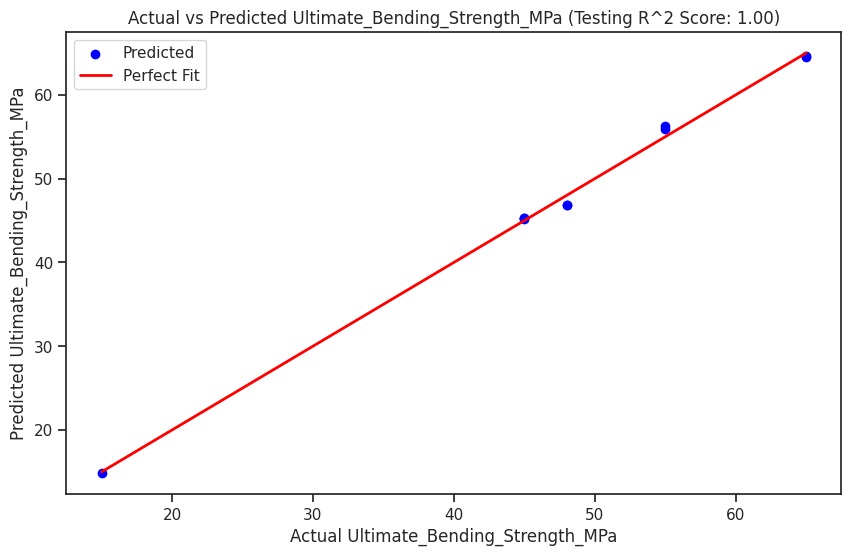

In [52]:
# Plot Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Ultimate_Bending_Strength_MPa')
plt.ylabel('Predicted Ultimate_Bending_Strength_MPa')
plt.title(f'Actual vs Predicted Ultimate_Bending_Strength_MPa (Testing R^2 Score: {r2_test:.2f})')
plt.legend()
plt.show()

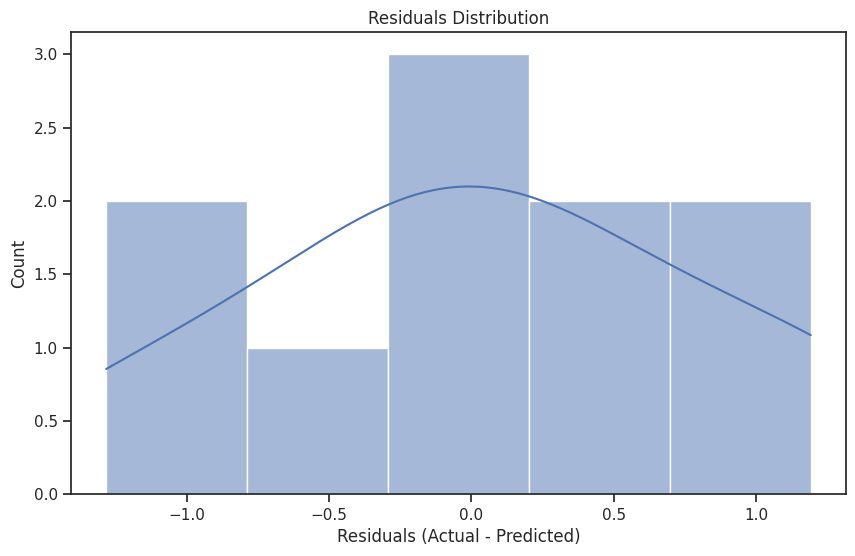

In [53]:
# Plot residuals to check for any patterns
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

In [55]:
# Display the final model equation
intercept = model.intercept_
coefficients = model.coef_
features = poly.get_feature_names_out(X.columns)
equation = f"Ultimate_Bending_Strength_MPa = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f}) * {feature}"

print("\nFinal Regression Equation:")
print(equation)


Final Regression Equation:
Ultimate_Bending_Strength_MPa = 0.49 + (26.36) * Youngs_Modulus_GPa + (6.18) * Layer_Height_mm + (-0.03) * Infill_Density_perc + (-2.18) * Youngs_Modulus_GPa^2 + (-0.26) * Youngs_Modulus_GPa Layer_Height_mm + (-0.00) * Youngs_Modulus_GPa Infill_Density_perc + (-11.91) * Layer_Height_mm^2 + (-0.01) * Layer_Height_mm Infill_Density_perc + (0.00) * Infill_Density_perc^2


In [56]:
# Display Actual vs Predicted for inspection
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Compression Strength (MPa):")
print(comparison_df)


Actual vs Predicted Compression Strength (MPa):
    Actual  Predicted
28      45  45.148661
11      55  55.916685
10      55  56.283045
41      15  14.864182
2       65  64.677700
27      45  45.352281
38      48  46.807833
31      48  46.815080
22      45  45.251165
4       65  64.507513
